<a href="https://colab.research.google.com/github/pujakr2/puja-kumari/blob/main/AI_Based_Image_Transformation(Milestone_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task1: Convert original image into sketch image using opencv

---



---



In [1]:
pip install opencv-python


In [2]:
import cv2


In [4]:
# Load your image (replace 'your_image.jpg' with your file name)
image = cv2.imread('babashaheb.jpg')

# Resize (optional — just to make it easier to view)
image = cv2.resize(image, (300, 300))

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [6]:
inverted_image = cv2.bitwise_not(gray_image)
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)
inverted_blur = cv2.bitwise_not(blurred)

In [7]:
pencil_sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)

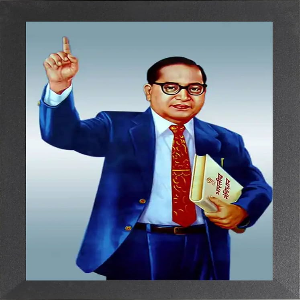

In [8]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

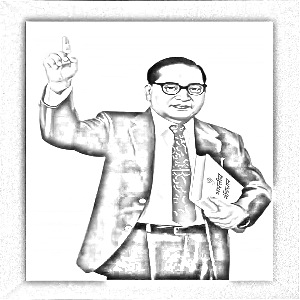

In [9]:
cv2_imshow(pencil_sketch)

Task2: Convert original image into sketch image without using opencv

---



---



In [10]:
from PIL import Image, ImageOps, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [11]:
uploaded = files.upload()  # Choose an image from your device
image_path = list(uploaded.keys())[0]

Saving lake image.jpg to lake image.jpg


In [12]:
image = Image.open(image_path).convert("RGB")

In [13]:
gray = ImageOps.grayscale(image)

In [14]:
inverted = ImageOps.invert(gray)

In [15]:
blurred = inverted.filter(ImageFilter.GaussianBlur(radius=12))

In [16]:
gray_array = np.array(gray, dtype=float)
blur_array = np.array(blurred, dtype=float)


In [17]:
pencil_sketch = 255 * (gray_array / (255 - blur_array + 1e-6))
pencil_sketch = np.clip(pencil_sketch, 0, 255).astype(np.uint8)

In [18]:

sketch_image = Image.fromarray(pencil_sketch)

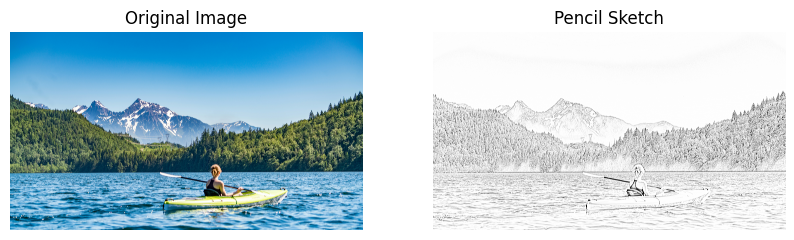

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Pencil Sketch")
plt.imshow(sketch_image, cmap="gray")
plt.axis("off")

plt.show()

In [20]:
!pip install --upgrade pip
!pip install opencv-python-headless pillow matplotlib numpy torch torchvision diffusers transformers accelerate safetensors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


Task3: Convert an image into different styles of oil painting


---



1️⃣ OpenCV — Fast Stylization Filters

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image

In [22]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

Saving lake image.jpg to lake image (1).jpg


In [23]:
img_bgr = cv2.imread(img_path)
img_bgr = cv2.resize(img_bgr, (768, int(768 * img_bgr.shape[0] / img_bgr.shape[1])))

In [24]:
stylized = cv2.stylization(img_bgr, sigma_s=160, sigma_r=0.99)  # sigma_s: range 0-200, sigma_r: 0-1

In [25]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
stylized_rgb = cv2.cvtColor(stylized, cv2.COLOR_BGR2RGB)


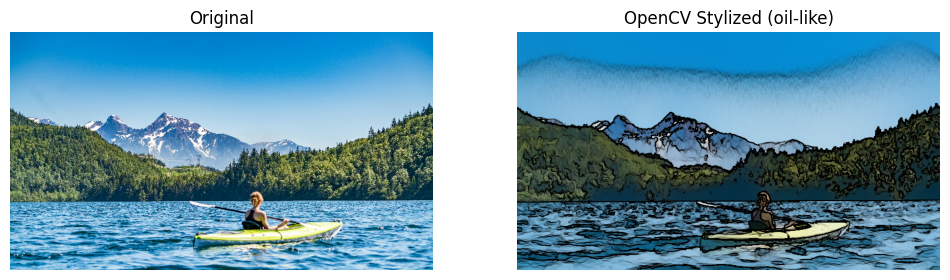

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.title("Original"); plt.imshow(img_rgb); plt.axis('off')
plt.subplot(1,2,2); plt.title("OpenCV Stylized (oil-like)"); plt.imshow(stylized_rgb); plt.axis('off')
plt.show()

2️⃣ Stable Diffusion img2img — Multiple Oil Painting Prompt

In [27]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

In [28]:
import os
HF_TOKEN = os.environ.get("HF_TOKEN", "")  # set in runtime env or replace with your token string
if HF_TOKEN == "":
    print("Please set HF_TOKEN in environment before running. In Colab: %env HF_TOKEN=your_token_here")
else:
    print("HF token present")

Please set HF_TOKEN in environment before running. In Colab: %env HF_TOKEN=your_token_here


In [29]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
init_image = Image.open(img_path).convert("RGB").resize((768, 512))

Saving lake1 to lake1


In [30]:
model_id = "runwayml/stable-diffusion-v1-5"  # or another SD1.5/2.1 model you have access to
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True, use_auth_token=HF_TOKEN)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': ''} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [31]:
prompts = [
    "Oil painting, high detail, impasto brush strokes, dramatic lighting, by Ivan Aivazovsky, realistic",
    "Classic oil portrait, Rembrandt style, warm tones, fine brushwork",
    "Impressionist oil painting, Monet style, visible brushstrokes and soft edges, vibrant colors",
]

results = []
strength = 0.7  # how much to change the original (0.4-0.8 typical)
num_inference_steps = 30
guidance_scale = 7.5

for prompt in prompts:
    out = pipe(prompt=prompt, image=init_image, strength=strength, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps)
    results.append(out.images[0])

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

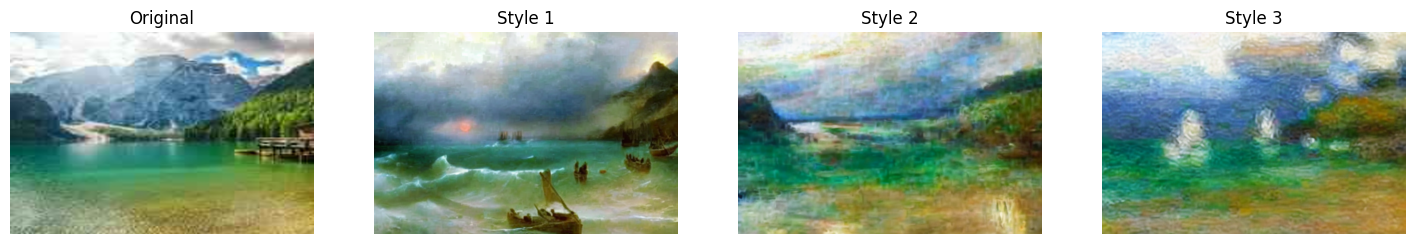

In [32]:
plt.figure(figsize=(18,6))
plt.subplot(1, len(results)+1, 1); plt.title("Original"); plt.imshow(init_image); plt.axis('off')
for i, img in enumerate(results):
    plt.subplot(1, len(results)+1, i+2); plt.title(f"Style {i+1}"); plt.imshow(img); plt.axis('off')
plt.show()

In [33]:
for i, img in enumerate(results):
    img.save(f"sd_oil_style_{i+1}.png")

3️⃣Neural Style Transfer (PyTorch VGG19)

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [35]:
print("Upload content (photo) then style (oil painting sample)")

# Upload content image
print("Upload content image:")
uploaded_content = files.upload()
if not uploaded_content:
    print("No content file uploaded. Please upload a content image.")
else:
    content_path = list(uploaded_content.keys())[0]
    print(f"Content image uploaded: {content_path}")

    # Upload style images one by one
    style_paths = []
    num_styles = 2  # You can change this to upload more style images
    for i in range(num_styles):
        print(f"Upload style image {i+1}:")
        uploaded_style = files.upload()
        if not uploaded_style:
            print(f"No file uploaded for style {i+1}. Skipping.")
            continue
        style_paths.append(list(uploaded_style.keys())[0])
        print(f"Style image {i+1} uploaded: {style_paths[-1]}")

    # Now style_paths contains the paths to the uploaded style images
    # The rest of the code in the following cells will use content_path and style_paths

Upload content (photo) then style (oil painting sample)
Upload content image:


Saving lake1 to lake1 (1)
Content image uploaded: lake1 (1)
Upload style image 1:


Saving lake1 to lake1 (2)
Style image 1 uploaded: lake1 (2)
Upload style image 2:


Saving lake1 to lake1 (3)
Style image 2 uploaded: lake1 (3)


In [36]:
def load_image(path, max_size=512):
    image = Image.open(path).convert('RGB')
    size = max(image.size)
    if size > max_size:
        scale = max_size / float(size)
        image = image.resize((int(image.width*scale), int(image.height*scale)), Image.LANCZOS)
    loader = transforms.Compose([
        transforms.ToTensor()
    ])
    return loader(image).unsqueeze(0).to(device)

content = load_image(content_path, max_size=512)

# Assuming content_path and style_paths are defined in the previous cell

# The rest of the NST code should process each style image in style_paths
# This will be handled in the next cells

In [37]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


100%|██████████| 548M/548M [00:11<00:00, 48.2MB/s]


In [38]:
def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    features = tensor.view(b * c, h * w)
    G = torch.mm(features, features.t())
    return G.div(b * c * h * w)

In [39]:
content_layers = ['21']  # relu4_2
style_layers = ['0','5','10','19','28']  # relu1_1,relu2_1,relu3_1,relu4_1,relu5_1

Applying style from: lake1 (2)
Step [100/300], Loss: 0.0000
Step [200/300], Loss: 0.0000
Step [300/300], Loss: 0.0000
Applying style from: lake1 (3)
Step [100/300], Loss: 0.0000
Step [200/300], Loss: 0.0000
Step [300/300], Loss: 0.0000


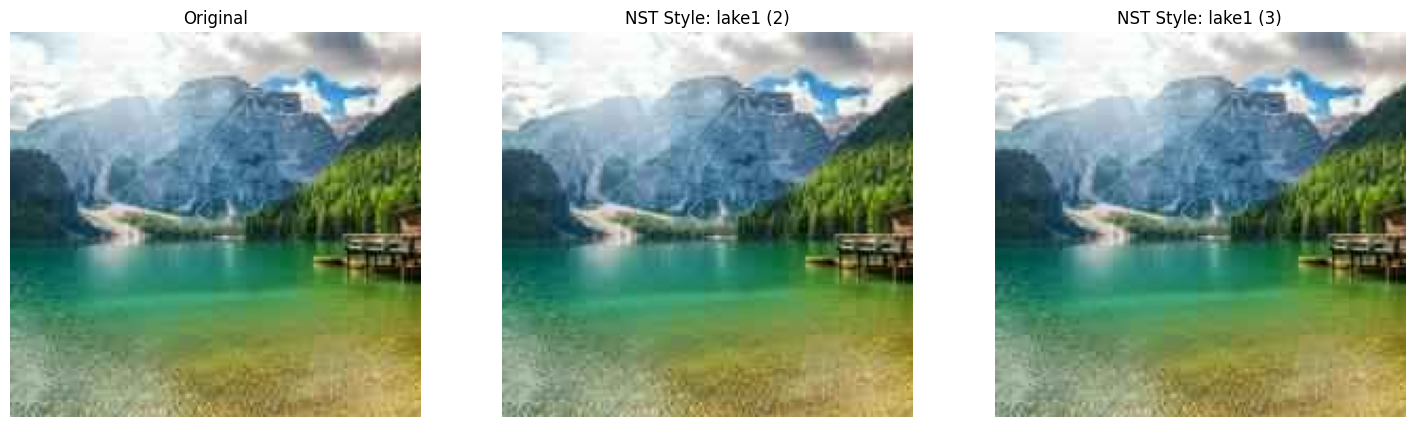

In [40]:
def get_features(x):
    features = {}
    layers={'0':'conv1_1','5':'conv2_1','10':'conv3_1','19':'conv4_1','21':'conv4_2','28':'conv5_1'} # Corrected layer names based on VGG19 features
    for name, layer in cnn._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

content_features = get_features(content)
content_layer = 'conv4_2' # Content layer
content_weight = 1 # Weight for content loss
style_weight = 1e6 # Weight for style loss


results_nst = []
titles_nst = []

# Loop through each style image path
for style_path in style_paths:
    print(f"Applying style from: {style_path}")
    style = load_image(style_path, max_size=512) # Load the style image
    style_features = get_features(style)
    style_grams = {l: gram_matrix(style_features[l]) for l in style_features}

    # Initialize the target image as a clone of the content image
    target = content.clone().requires_grad_(True).to(device)

    # Optimizer
    optimizer = optim.Adam([target], lr=0.02)

    # Training loop
    num_steps = 300 # Number of optimization steps (can be adjusted)
    for step in range(num_steps):
        target_features = get_features(target)

        # Content loss
        content_loss = torch.mean((target_features[content_layer]-content_features[content_layer])**2)

        # Style loss
        style_loss = 0
        for l in style_grams:
            t_feat = target_features[l]
            t_gram = gram_matrix(t_feat)
            s_gram = style_grams[l]
            style_loss += torch.mean((t_gram - s_gram)**2)

        # Total loss
        total_loss = content_weight*content_loss + style_weight*style_loss

        # Backpropagate and update
        optimizer.zero_grad()
        total_loss.backward(retain_graph=True) # Added retain_graph=True
        optimizer.step()

        # Print progress
        if (step+1) % 100 == 0:
            print(f'Step [{step+1}/{num_steps}], Loss: {total_loss.item():.4f}')

    # Detach the target image from the graph, move to CPU, clamp values and convert to PIL Image
    out_img = target.detach().cpu().squeeze(0).clamp(0,1)
    img_pil = transforms.ToPILImage()(out_img)

    results_nst.append(img_pil)
    titles_nst.append("NST Style: "+style_path.split('/')[-1]) # Use filename as title

# Display results (This part will be in the next cell usually, but added here for a single run)
plt.figure(figsize=(18, 6))
plt.subplot(1, len(results_nst) + 1, 1)
plt.title("Original")
plt.imshow(transforms.ToPILImage()(content.cpu().squeeze(0))) # Display original content image
plt.axis("off")

for i, img in enumerate(results_nst):
    plt.subplot(1, len(results_nst) + 1, i + 2)
    plt.title(titles_nst[i])
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [41]:
target = content.clone().requires_grad_(True).to(device)

In [42]:
style_weight = 1e6
content_weight = 1e0
optimizer = optim.LBFGS([target], lr=1.0)